1.	Load the data into a Python session as a Pandas DataFrame. Check if all columns are in correct type, and fix any incorrect ones if necessary

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("auto-mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

2.	Split the data 75% training and 25% testing

In [6]:
from sklearn.model_selection import train_test_split

random_state = 42
train_data, test_data = train_test_split(df, test_size=0.25, random_state=random_state)

In [7]:
train_data.shape

(298, 9)

In [8]:
test_data.shape

(100, 9)

3.	Visualize necessary columns in the data. After this point, you should have three lists:

•	Columns that are numeric and have symmetric distributions

•	Columns that are numeric and have skewed distributions

•	Columns that are categorical


In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include='object').columns

print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')
Categorical columns: Index(['car name'], dtype='object')


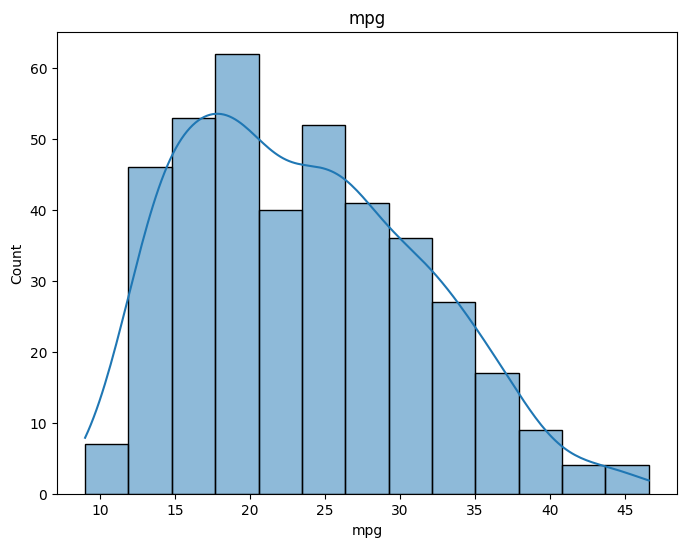

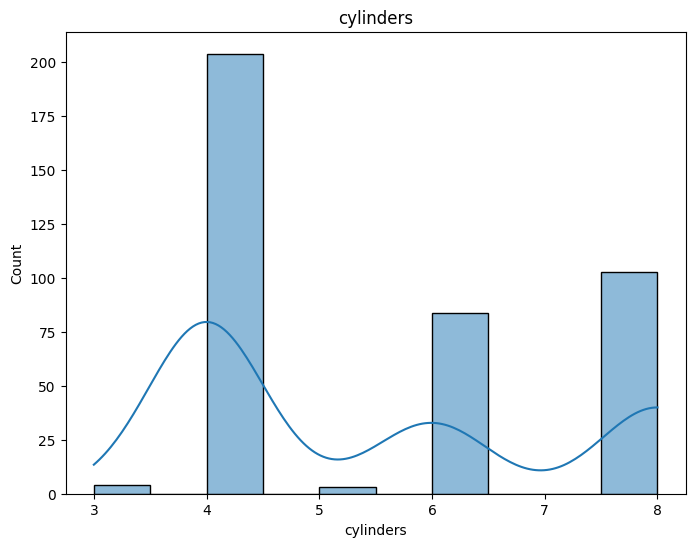

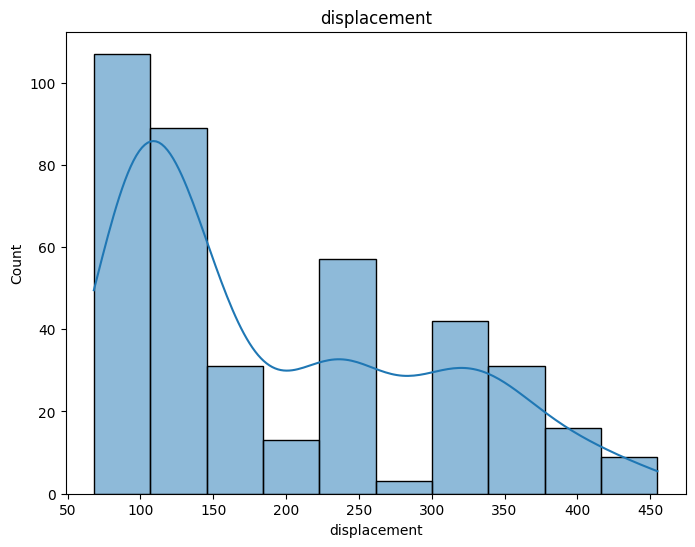

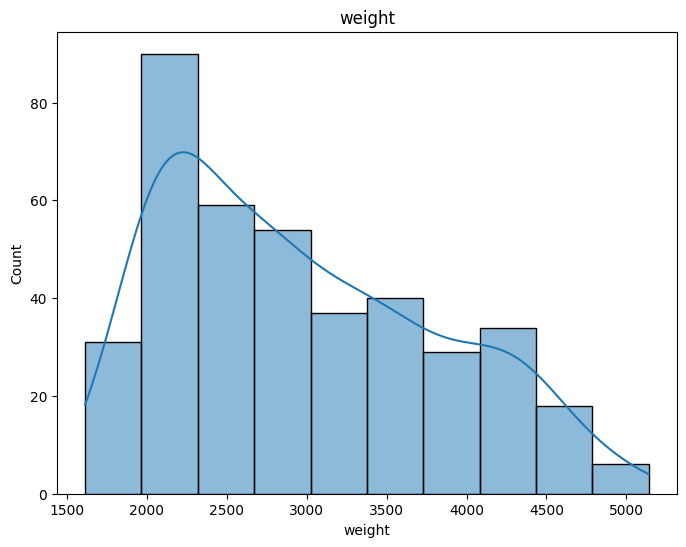

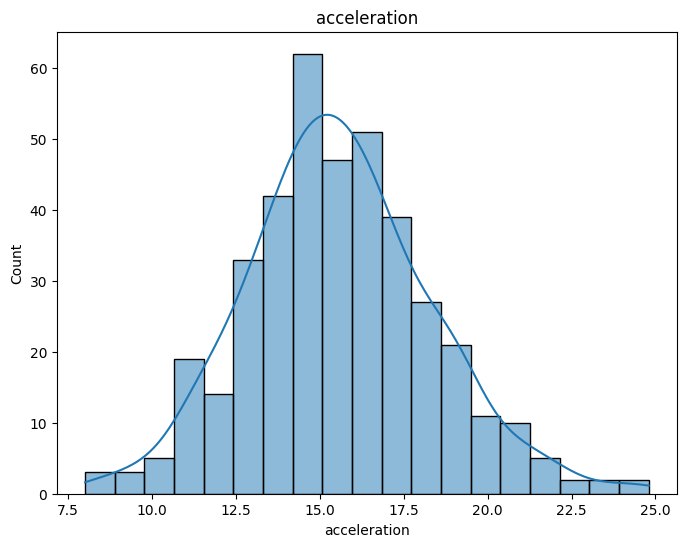

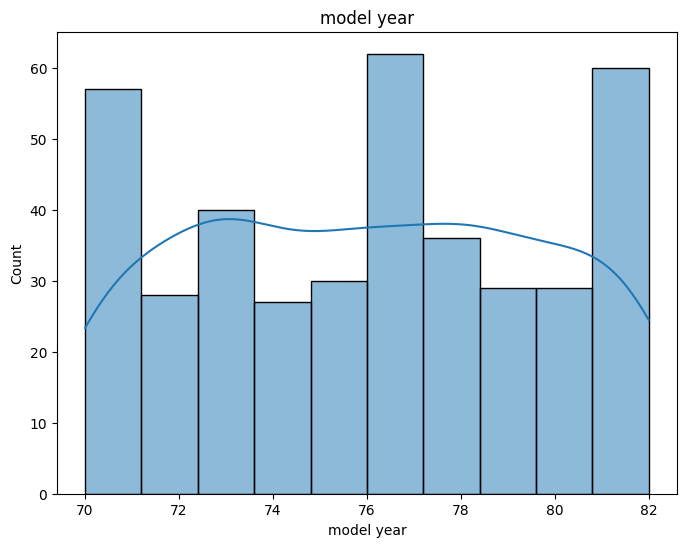

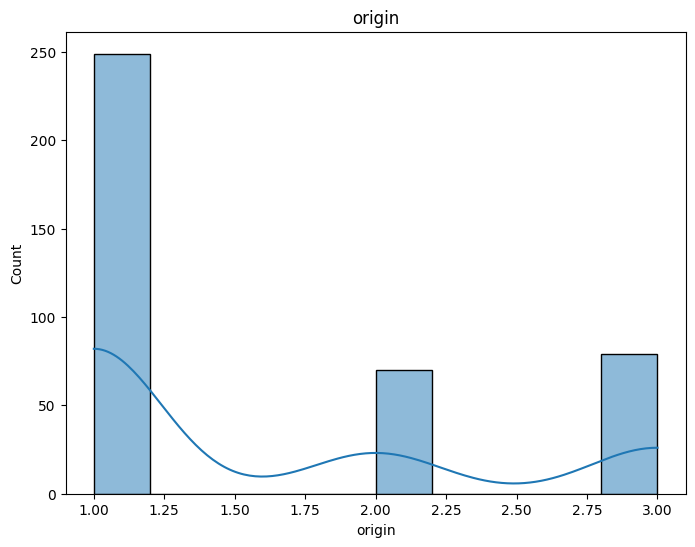

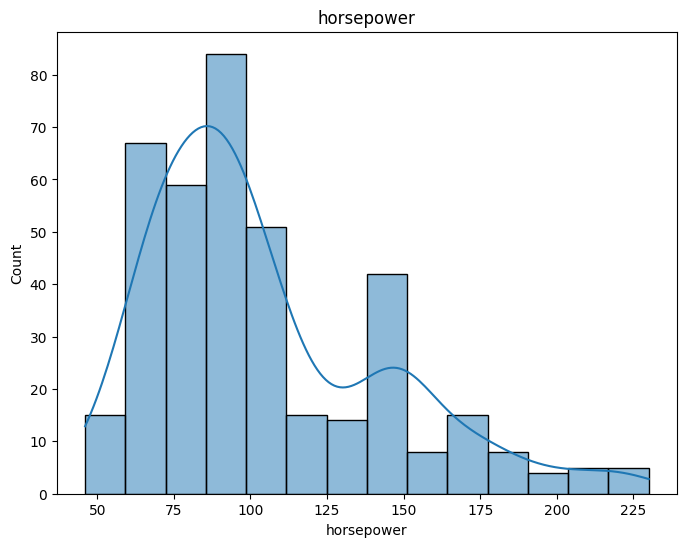

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

symmetric_columns = []
skewed_columns = []

for column in numeric_columns:
    if df[column].skew() > -1 and df[column].skew() < 1:
        symmetric_columns.append(column)
    else:
        skewed_columns.append(column)

for column in symmetric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.show()

for column in skewed_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.show()


4.	Build a pipeline as follows:

•	Numeric and symmetric columns: 	Imputation -> Standardization

•	Numeric and skewed columns:		Imputation -> Log transformation -> Standardization

•	Categorical columns: 			One hot encoder


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
import numpy as np

# Define the pipeline for numeric and symmetric columns
numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('standardizer', StandardScaler())
])

# Define the pipeline for numeric and skewed columns
numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=False)),
    ('standardizer', StandardScaler())
])

# Define the pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder())
])

5.	Train the pipeline on the training data. Then perform transformation on the training data and testing data.

In [12]:
from sklearn.compose import ColumnTransformer

numeric_symmetric_columns = df[symmetric_columns].columns
numeric_skewed_columns = df[skewed_columns].columns
categorical_columns = df[categorical_columns].columns

preprocessor = ColumnTransformer([
    ('numeric_symmetric', numeric_symmetric_pipeline, symmetric_columns),
    ('numeric_skewed', numeric_skewed_pipeline, skewed_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

preprocessor.fit(df)
train_data_preprocessed = preprocessor.transform(train_data)
test_data_preprocessed = preprocessor.transform(test_data)

6.	Print the shape of the processed training data and processed testing data.

In [13]:
train_data_preprocessed.shape

(298, 313)

In [14]:
test_data_preprocessed.shape

(100, 313)